In [2]:
import pandas as pd

file_path = r"C:\Users\vdivy\OneDrive - AUT University\Desktop\PROJECTS 2025\archive (18)\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Basic info about dataset columns, data types, and missing values
df.info()

# Statistical summary for numerical and categorical features
df.describe(include='all')

# Check for missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

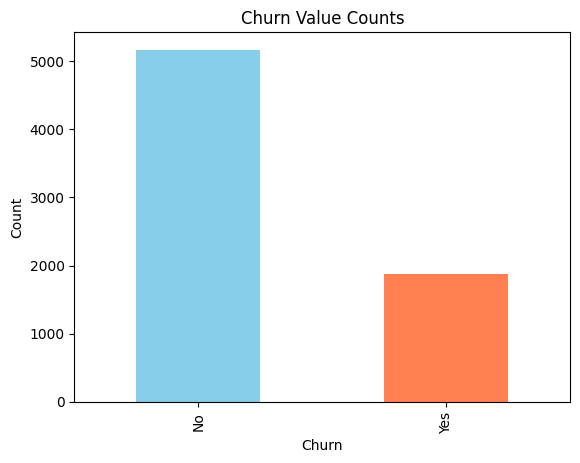

In [4]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'coral'])
plt.title('Churn Value Counts')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())  # Also view as df[df['TotalCharges'].isnull()]
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


11


In [6]:
df.drop('customerID', axis=1, inplace=True)


In [7]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})


In [8]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)


In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.8019872249822569
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



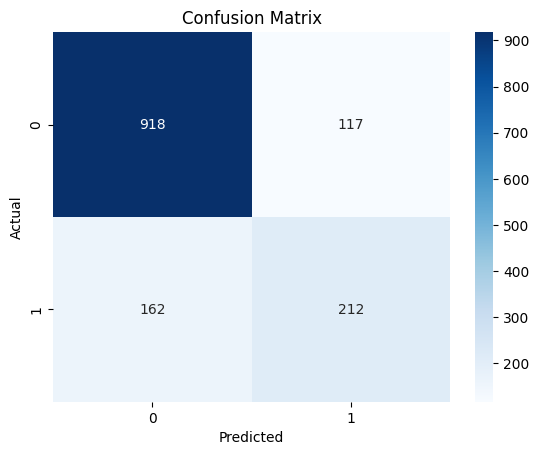

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = lr.predict(X_test)

# Accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:
import numpy as np
feature_importance = pd.Series(np.abs(lr.coef_[0]), index=X.columns).sort_values(ascending=False)
print(feature_importance.head(10))


Contract            0.835497
PhoneService        0.544934
PaperlessBilling    0.408397
Dependents          0.292352
OnlineSecurity      0.289249
TechSupport         0.271219
SeniorCitizen       0.240997
OnlineBackup        0.142352
MultipleLines       0.105390
DeviceProtection    0.082557
dtype: float64


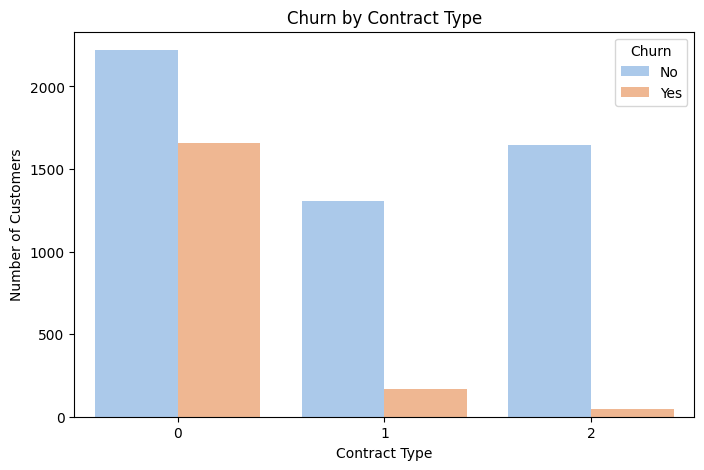

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


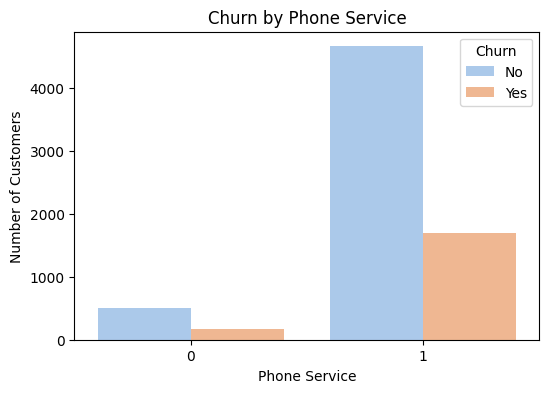

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='PhoneService', hue='Churn', palette='pastel')
plt.title('Churn by Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


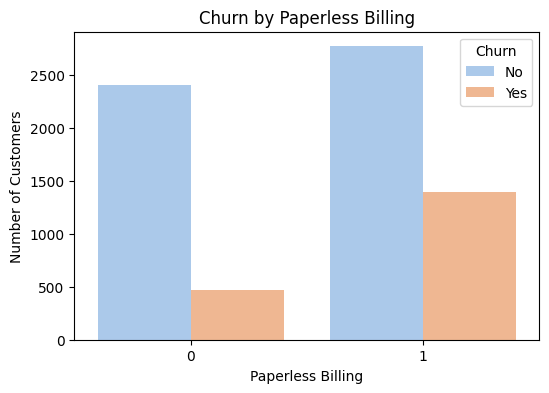

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', palette='pastel')
plt.title('Churn by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()
